##### Download MNIST images of handwritten digits

In [1]:
import sys
sys.path.append('../..')  # to go to the main folder of the whole project

# Define the model name
NAME = 'ae_van_mnist_1latd_75ep_bat100_mse_100_50_25_12'

# Download data
from src.data.mnist.load_mnist_data import load_mnist_data
(x_train, y_train), (x_test, y_test) = load_mnist_data()

##### Create and train the model

In [2]:
# Create VAE and fit it
from src.models.ae_vanilla import AeVanilla
ae = AeVanilla(input_shape=x_train.shape[1:],
                 hidden_layers_nodes=[100, 50, 25, 12],
                 latent_space_dim=1,
                 loss_type='mse'
                 )
ae.compile(optimizer='adam')
history = ae.fit(x_train, 
                 epochs=75, 
                 batch_size=100,
                 validation_data=x_test
                 )

Epoch 1/75
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - total_loss: 0.0914 - val_total_loss: 0.0623
Epoch 2/75
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - total_loss: 0.0614 - val_total_loss: 0.0584
Epoch 3/75
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - total_loss: 0.0578 - val_total_loss: 0.0554
Epoch 4/75
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - total_loss: 0.0549 - val_total_loss: 0.0526
Epoch 5/75
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - total_loss: 0.0527 - val_total_loss: 0.0516
Epoch 6/75
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - total_loss: 0.0519 - val_total_loss: 0.0533
Epoch 7/75
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - total_loss: 0.0516 - val_total_loss: 0.0492
Epoch 8/75
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - total_loss: 0.0496 - val_total_loss: 0.0487
Epoch 9/75
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - total_loss: 0.0488 - val_total_loss: 0.0480
Epoch 10/75
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - total_loss: 0.0482 - val_total_loss: 0.0487
Epoch 11/75
600/600

##### Save the model

In [3]:
from src.utils.save_model_and_history import save_model_and_history
save_model_and_history(ae, 
                       history, 
                       save_name=NAME,
                       data_type='mnist')

c:\Users\alexi\Documents\All\ETH_UZH\MasterThesis\_MT_Vol_cube\code_my\autoencoder_library\venv\Lib\site-packages\keras\src\saving\saving_api.py:102: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  return saving_lib.save_model(model, filepath)


##### Load the model

In [4]:
from src.utils.load_model_and_history import load_model_and_history
ae, history = load_model_and_history(NAME,
                                      data_type='mnist')

c:\Users\alexi\Documents\All\ETH_UZH\MasterThesis\_MT_Vol_cube\code_my\autoencoder_library\venv\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


##### Plot history of losses

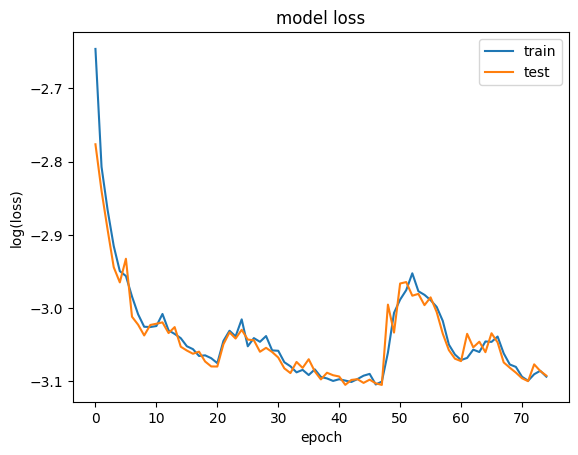

In [5]:
from src.visualization.plot_history_of_losses import plot_history_of_losses
plot_history_of_losses(history,
                       save_name=NAME,
                       data_type='mnist')

##### Plot true vs prediction images

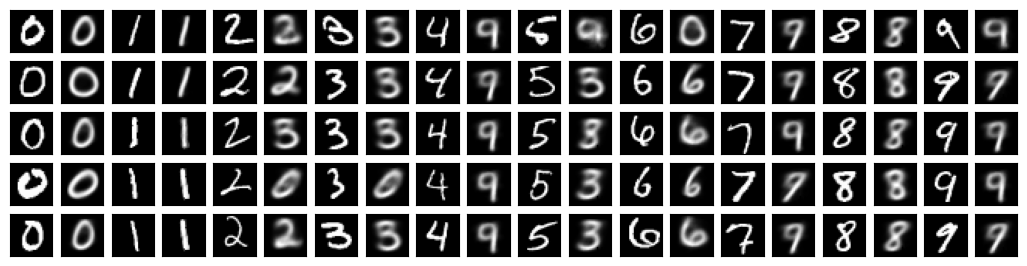

In [6]:
from src.visualization.mnist.plot_true_vs_prediction_images import plot_true_vs_prediction_images
plot_true_vs_prediction_images(ae, 
                               x_test, 
                               y_test,
                               save_name=NAME)

##### Plot 1d distribution of latent space values

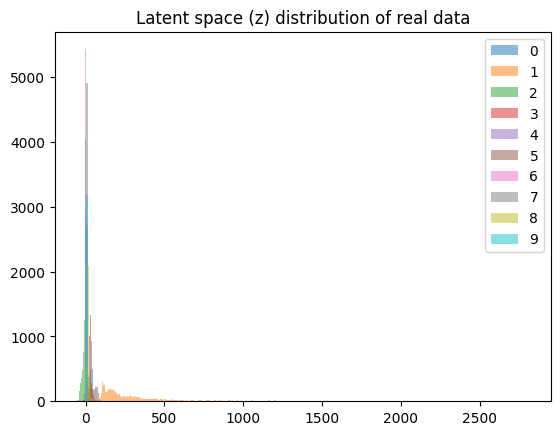

In [7]:
from src.visualization.plot_latent_space_1d_values import plot_latent_space_1d_values
plot_latent_space_1d_values(ae, 
                            x_train, 
                            y_train,
                            save_name=NAME,
                            data_type='mnist')